## Homework 4

## Question 1

In [1]:
import sqlite3 as sq3
import pandas as pd

con = sq3.connect("opioid.db")

population = pd.read_sql_query("SELECT * from population", con)
annual = pd.read_sql_query("SELECT * from annual", con)
land = pd.read_sql_query("SELECT * from land", con)

con.close

<function Connection.close()>

In [2]:
annual[annual['countyfips']=="NA"].head(10)

,?,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
187,188,ADJUNTAS,PR,2006,147,102800,NA
188,189,ADJUNTAS,PR,2007,153,104800,NA
189,190,ADJUNTAS,PR,2008,153,45400,NA
190,191,ADJUNTAS,PR,2009,184,54200,NA
191,192,ADJUNTAS,PR,2010,190,56200,NA
192,193,ADJUNTAS,PR,2011,186,65530,NA
193,194,ADJUNTAS,PR,2012,138,57330,NA
194,195,ADJUNTAS,PR,2013,138,65820,NA
195,196,ADJUNTAS,PR,2014,90,59490,NA
196,197,AGUADA,PR,2006,160,49200,NA


In [3]:
annual[(annual['countyfips']=="NA") & (annual['BUYER_STATE']!= "PR")].head(10)

,?,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
10071,10072,GUAM,GU,2006,319,265348,NA
10072,10073,GUAM,GU,2007,330,275600,NA
10073,10074,GUAM,GU,2008,313,286900,NA
10074,10075,GUAM,GU,2009,390,355300,NA
10075,10076,GUAM,GU,2010,510,413800,NA
10076,10077,GUAM,GU,2011,559,475600,NA
10077,10078,GUAM,GU,2012,616,564800,NA
10078,10079,GUAM,GU,2013,728,623200,NA
10079,10080,GUAM,GU,2014,712,558960,NA
17429,17430,MONTGOMERY,AR,2006,469,175390,NA


In [4]:
updated = (annual['BUYER_STATE'] == "AR") & (annual['BUYER_COUNTY']=="MONTGOMERY")
annual.loc[updated,'countyfips']= 5097
annual[(annual['BUYER_STATE'] == "AR") & (annual['BUYER_COUNTY']=="MONTGOMERY")]

,?,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
17429,17430,MONTGOMERY,AR,2006,469,175390,5097
17430,17431,MONTGOMERY,AR,2007,597,241270,5097
17431,17432,MONTGOMERY,AR,2008,561,251760,5097
17432,17433,MONTGOMERY,AR,2009,554,244160,5097
17433,17434,MONTGOMERY,AR,2010,449,247990,5097
17434,17435,MONTGOMERY,AR,2011,560,313800,5097
17435,17436,MONTGOMERY,AR,2012,696,339520,5097
17436,17437,MONTGOMERY,AR,2013,703,382300,5097
17437,17438,MONTGOMERY,AR,2014,491,396900,5097


In [5]:
annual = annual[annual.BUYER_COUNTY != "NA"]
annual.head()

,?,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
0,1,ABBEVILLE,SC,2006,877,363620,45001
1,2,ABBEVILLE,SC,2007,908,402940,45001
2,3,ABBEVILLE,SC,2008,871,424590,45001
3,4,ABBEVILLE,SC,2009,930,467230,45001
4,5,ABBEVILLE,SC,2010,1197,539280,45001


In [6]:
land_area = land[['Areaname','STCOU','LND110210D']]
land_area = land_area.rename(columns = {'STCOU':'countyfips'})
land_area.head()

,Areaname,countyfips,LND110210D
0,UNITED STATES,00000,3531905.43
1,ALABAMA,01000,50645.33
2,"Autauga, AL",01001,594.44
3,"Baldwin, AL",01003,1589.78
4,"Barbour, AL",01005,884.88


In [7]:
county_info = population.merge(land_area, on='countyfips',how = 'left')
county_info.head()

,?,BUYER_COUNTY,BUYER_STATE,countyfips,STATE,COUNTY,county_name,NAME,variable,year,population,Areaname,LND110210D
0,1,AUTAUGA,AL,01001,1,1,Autauga,"Autauga County, Alabama",B01003_001,2006,51328,"Autauga, AL",594.44
1,2,BALDWIN,AL,01003,1,3,Baldwin,"Baldwin County, Alabama",B01003_001,2006,168121,"Baldwin, AL",1589.78
2,3,BARBOUR,AL,01005,1,5,Barbour,"Barbour County, Alabama",B01003_001,2006,27861,"Barbour, AL",884.88
3,4,BIBB,AL,01007,1,7,Bibb,"Bibb County, Alabama",B01003_001,2006,22099,"Bibb, AL",622.58
4,5,BLOUNT,AL,01009,1,9,Blount,"Blount County, Alabama",B01003_001,2006,55485,"Blount, AL",644.78


In [8]:
print(land.shape)
print(land_area.shape)
print(county_info.shape)
print(population.shape)

(3198, 35)
(3198, 3)
(28265, 13)
(28265, 11)


In [12]:
county_info.columns

Index(['?', 'BUYER_COUNTY', 'BUYER_STATE', 'countyfips', 'STATE', 'COUNTY',
       'county_name', 'NAME', 'variable', 'year', 'population', 'Areaname',
       'LND110210D'],
      dtype='object')

## Question 2

In [9]:
annual1 = annual
annual1['DOSAGE_UNIT'] = annual1['DOSAGE_UNIT'].astype('float')
annual1['year'] = annual1['year'].astype('int')
annual1 = annual1.assign(Pills_in_millions = annual1.DOSAGE_UNIT/1000000)
annual1.head()

,?,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips,Pills_in_millions
0,1,ABBEVILLE,SC,2006,877,363620.0,45001,0.36362
1,2,ABBEVILLE,SC,2007,908,402940.0,45001,0.40294
2,3,ABBEVILLE,SC,2008,871,424590.0,45001,0.42459
3,4,ABBEVILLE,SC,2009,930,467230.0,45001,0.46723
4,5,ABBEVILLE,SC,2010,1197,539280.0,45001,0.53928


In [10]:
df = annual1[['Pills_in_millions','year']].groupby(['year']).mean().reset_index()
df = df.rename(columns = {'Pills_in_millions':'Average_pills_in_millions'})
df

,year,Average_pills_in_millions
0,2006,2.654669
1,2007,2.995906
2,2008,3.254271
3,2009,3.526038
4,2010,3.783656
5,2011,4.035583
6,2012,3.993064
7,2013,3.861752
8,2014,3.768738


<Axes: xlabel='year', ylabel='Average_pills_in_millions'>

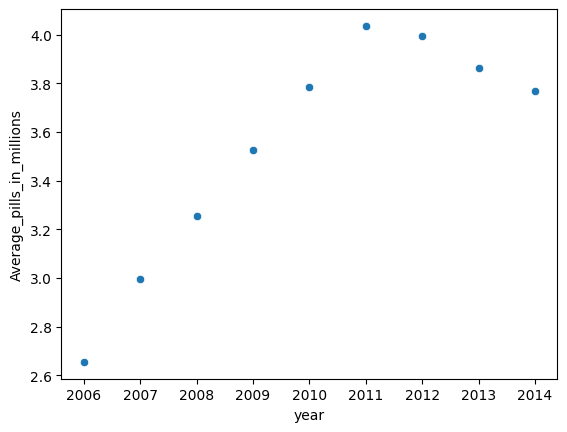

In [11]:
import seaborn as sns

sns.scatterplot(df, x = "year", y = "Average_pills_in_millions")

## Question 4

In [160]:
import os
os.environ['R_HOME'] = '/Users/yixuanchen/anaconda3/envs/myenv/lib/R' 

#import packages
import rpy2
import rpy2.rinterface as ri
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri #import pandas2ri to convert R dataframe to pandas dataframe
from rpy2.robjects.packages import importr

pandas2ri.activate() #activate pandas2ri

hw4_r_code = ro.r('''
                annual <- read.csv("county_annual.csv")
                population <- read.csv("county_pop_arcos.csv")
                land <- read.csv("land_area.csv")
                
                head(annual[annual$countyfips == "NA", ])
                
                head(annual[annual$countyfips == "NA" & annual$BUYER_STATE != "PR", ])
                
                updated <- annual$BUYER_STATE == "AR" & annual$BUYER_COUNTY == "MONTGOMERY"
                annual$countyfips[updated] <- 5097
                head(annual[annual$BUYER_STATE == "AR" & annual$BUYER_COUNTY == "MONTGOMERY", ])
                
                annual <- annual[annual$BUYER_COUNTY != "NA", ]
                head(annual)
                
                land_area <- land[, c("Areaname", "STCOU", "LND110210D")]
                names(land_area) <- c("Areaname", "countyfips", "LND110210D")
                head(land_area)
                
                county_info <- merge(population, land_area, by = "countyfips", all.x = TRUE)
                head(county_info)
                
                dim(land)
                dim(land_area)
                dim(county_info)
                dim(population)

                ''')
 #added line at the end that printed countyinfoR in R so we could get that result in pandas
with (ro.default_converter + pandas2ri.converter).context(): #used conversion code from docs
  county_info_R = ro.conversion.get_conversion().rpy2py(hw4_r_code)

county_info_R

,countyfips,X,BUYER_COUNTY,BUYER_STATE,STATE,COUNTY,county_name,NAME,variable,year,population,Areaname,LND110210D
1,1001,12567,AUTAUGA,AL,1,1,Autauga,"Autauga County, Alabama",B01003_001,2010,53155,"Autauga, AL",594.44
2,1001,6285,AUTAUGA,AL,1,1,Autauga,"Autauga County, Alabama",B01003_001,2008,53277,"Autauga, AL",594.44
3,1001,3143,AUTAUGA,AL,1,1,Autauga,"Autauga County, Alabama",B01003_001,2007,52405,"Autauga, AL",594.44
4,1001,9427,AUTAUGA,AL,1,1,Autauga,"Autauga County, Alabama",B01003_001,2009,49584,"Autauga, AL",594.44
5,1001,1,AUTAUGA,AL,1,1,Autauga,"Autauga County, Alabama",B01003_001,2006,51328,"Autauga, AL",594.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28261,56045,9423,WESTON,WY,56,45,Weston,"Weston County, Wyoming",B01003_001,2008,7133,"Weston, WY",2398.09
28262,56045,6281,WESTON,WY,56,45,Weston,"Weston County, Wyoming",B01003_001,2007,7033,"Weston, WY",2398.09
28263,56045,25123,WESTON,WY,56,45,Weston,"Weston County, Wyoming",B01003_001,2013,7153,"Weston, WY",2398.09
28264,56045,12563,WESTON,WY,56,45,Weston,"Weston County, Wyoming",B01003_001,2009,6765,"Weston, WY",2398.09
